# Project: We Rate Dogs

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Analysis and Visualization</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import tweepy
import os
import re

<a id='wrangling'></a>
## Data Wrangling

### Gathering data sets

In [2]:
#Loading data set into pandas dataframe (ta = twitter archive)
ta = pd.read_csv('twitter-archive-enhanced.csv')
ta.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#downloading the image prediction file from the url
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [4]:
#loading the image prediction file into a pandas data frame (ip = image prediction)
ip = pd.read_csv('image_predictions.tsv', sep='\t')
ip.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# Loading queried tweets into a pandas data frame
tweet = pd.read_json('tweet_json.txt', orient= 'records', lines= True)
tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [6]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Assessing data sets

In [7]:
ta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
sum(ta.duplicated('source'))

2352

In [9]:
ta.query('rating_denominator != 10').shape

(23, 17)

In [10]:
ta.query('rating_numerator >15').shape

(26, 17)

In [11]:
ta['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [12]:
ta[ta['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [13]:
sum(ta.expanded_urls.duplicated())

137

In [14]:
ta[ta['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [15]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
x = ip['p1'].value_counts()

In [17]:
x.head(50)

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
cocker_spaniel                     30
malamute                           30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          20
Cardigan                           19
web_site                           19
Eskimo_dog                         18
Maltese_dog                        18
Shetland_sheepdog                  18
teddy                              18
beagle                             18
Lakeland_terrier                   17
Rottweiler  

In [18]:
ip.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [19]:
ip.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [20]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

### Quality Issues
Twitter archive table
1. data type for time stamp is an object instead of date-time format
2. Some rating denominators are not 10
3. Some rating numerators exceed normal ratings (e.g. 420, 170, 50, 1776, 27, 60)
4. Null values in 'expanded_urls' column hence, some tweets do not have images and some values are duplicated
5. Retweet column indicates tweets that are not original
6. 'name' column contains some wrong names (e.g. a, an, such)
7. Redundant source, retweet, in_reply and rating_denominator columns

Image prediction table

8. Some data samples are not dogs (hence column P1 are not dog names and P1_dog returns false)
9. Selecting needed columns from the table

Tweet table

10. Selecting needed columns

### Tidiness Issues
1. Redundant columns [doggo floofer	Tits Puppo] should form a column 'stage'
2. Column names need to be renamed to describe the observation better and make it understandable

### Cleaning data sets

#### Cleaning Quality Issues

In [21]:
# Creating a copy of the datasets
tac = ta.copy()
ipc = ip.copy()
tweetc = tweet.copy()

### Issue #1

#### Define

Converting datatype for 'timestamp' to date-time format

#### Code

In [22]:
tac['timestamp'] = pd.to_datetime(tac['timestamp'])

#### Test

In [23]:
tac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2

#### Define

dropping data samples where rating denominators are not = 10

#### Code

In [25]:
tac = tac.query('rating_denominator ==10')

#### Test

In [26]:
tac.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

### Issue #3

#### Define

dropping data samples where rating numerators are greater than 15

#### Code

In [27]:
tac = tac.query('rating_numerator <= 15')

#### Test

In [28]:
tac.rating_numerator.value_counts()

12    558
11    463
10    461
13    351
9     156
8     102
14     54
7      54
5      37
6      32
3      19
4      15
2       9
1       8
15      2
0       2
Name: rating_numerator, dtype: int64

### Issue #4

#### Define

dropping null values in expanded url column and removing duplicate rows

#### Code

In [29]:
tac.dropna(subset=['expanded_urls'], inplace=True)

In [30]:
tac.drop_duplicates(subset = 'expanded_urls', inplace= True)

#### Test

In [31]:
sum(tac.expanded_urls.isnull())

0

In [32]:
sum(tac.expanded_urls.duplicated())

0

### Issue #5

#### Define

dropping rows with retweet column values since we need only original tweets

#### Code

In [33]:
tac = tac[tac['retweeted_status_id'].isnull()]

#### Test

In [34]:
sum(tac.retweeted_status_id.notnull())

0

### Issue #6

#### Define

Fixing name column with wrong values. Changing the wrong names to 'None' and changing all 'None' to NaN. It is observed that the wrong names are all in a lower case and this would be used to distinguish them from the actual names

#### Code

In [35]:
tac.name.value_counts()

None          591
a              54
Lucy           11
Charlie        10
Penny           9
             ... 
Lilli           1
Boston          1
Brandonald      1
Corey           1
Christoper      1
Name: name, Length: 925, dtype: int64

In [36]:
tac['name'] = tac.name.apply(lambda x: re.sub('^[a-z]+', "None", x))

In [37]:
tac.name.replace('None', np.NaN, inplace= True)

#### Test

In [38]:
tac.name.value_counts()

Lucy          11
Charlie       10
Tucker         9
Oliver         9
Cooper         9
              ..
Harvey         1
Blanket        1
Geno           1
Stark          1
Christoper     1
Name: name, Length: 900, dtype: int64

In [39]:
tac.query('name == "None"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [40]:
sum(tac.name.isnull())

689

### Issue #7

#### Define

Dropping redundant source, retweet, in_reply, and the rating_denominator columns

#### Code

In [41]:
tac.drop(['source', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [42]:
tac.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None


### Issue #8

#### Define

dropping data samples on the image prediction data frame where p1_dog are false (i.e. are not dogs). Hence, keeping the true values for p1_dog since it contains the highest prediction probability for dogs

#### Code

In [43]:
ipc = ipc[~((ipc.p1_dog == False))]

#### Test

In [44]:
ipc.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### Issue #9

#### Define

Selecting needed columns from image prediction dataset

#### Code

In [45]:
ipc = ipc[['tweet_id', 'p1', 'p1_conf']]

#### Test

In [46]:
ipc.head(1)

,tweet_id,p1,p1_conf
0,666020888022790149,Welsh_springer_spaniel,0.465074


### Issue #10

#### Define

Selecting needed columns from tweet table

#### Code

In [47]:
tweetc = tweetc[['id', 'retweet_count', 'favorite_count']]

#### Test

In [48]:
tweetc.head(1)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467


### Cleaning tidiness issues

### Issue #1

#### Define

Redundant columns [doggo floofer	Tits Puppo] should form a column 'stage' (and changing 'None' to null values)

#### Code

In [49]:
tac = pd.melt(tac, id_vars = ['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator', 'name'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], value_name = 'stage')

In [50]:
#dropping the variable column
tac.drop(columns='variable', axis=1, inplace=True)

In [51]:
# Dropping duplicates
tac.drop_duplicates(inplace=True)

In [ ]:
# Replace None with NaN
tac.stage.replace('None', np.NaN, inplace= True)

#### Test

In [52]:
tac.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None


In [53]:
sum(tac.duplicated())

0

In [56]:
tac[tac.stage == 'None']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,name,stage


### Issue #2

#### Define

Renaming column names for better description in all data sets

#### Code

In [57]:
tac.rename(columns={'expanded_urls': "image_urls", 'rating_numerator': "rating"}, inplace=True)

In [58]:
ipc.rename(columns={'p1': "dog_breed", 'p1_conf': "breed_prediction"}, inplace=True)

In [59]:
tweetc.rename(columns={'id': "tweet_id"}, inplace=True)

#### Test

In [60]:
tac.head(1)

,tweet_id,timestamp,text,image_urls,rating,name,stage
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,NaN


In [61]:
ipc.head(1)

,tweet_id,dog_breed,breed_prediction
0,666020888022790149,Welsh_springer_spaniel,0.465074


In [62]:
tweetc.head(1)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467


### Merge all datasets into one

#### Code

In [63]:
dfs = [tac, tweetc, ipc]
import functools as ft
rate_dogs = ft.reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), dfs)

#### Test

In [64]:
rate_dogs.head(2)

,tweet_id,timestamp,text,image_urls,rating,name,stage,retweet_count,favorite_count,dog_breed,breed_prediction
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,6514,33819,Chihuahua,0.323581
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,NaN,4328,25461,Chihuahua,0.716012


In [65]:
rate_dogs.shape

(1626, 11)

## Storing Data

#Save dataset
#rate_dogs.to_csv('twitter_archive_master.csv', index=False)

In [66]:
df = pd.read_csv('twitter_archive_master.csv')
df.head(1)

,tweet_id,timestamp,text,image_urls,rating,name,stage,retweet_count,favorite_count,dog_breed,breed_prediction
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,NaN,6514,33819,Chihuahua,0.323581


<a id='eda'></a>

## Analysis and Visualization

### Insights
1. Most popular dog breeds
2. Most popular dog stages
3. Dog breeds with the highest number of retweet count and favorite count
4. Dog stages with the highest number of retweet count and favorite count
5. Top rated dog breeds
6. Highest rated dog breeds
7. Common dog names

### Most popular dog breeds

In [67]:
df.dog_breed.value_counts()

golden_retriever      161
Labrador_retriever    105
Pembroke               98
Chihuahua              85
pug                    62
                     ... 
Scotch_terrier          1
silky_terrier           1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
Name: dog_breed, Length: 110, dtype: int64

### Most popular dog stages

In [68]:
df.stage.value_counts()

pupper     143
doggo       56
puppo       18
floofer      8
Name: stage, dtype: int64

### Dog breeds with the highest number of retweet count and favorite count

In [70]:
df.groupby(['dog_breed']).retweet_count.sum().sort_values(ascending=False)

dog_breed
golden_retriever      588520
Labrador_retriever    454825
Pembroke              319421
Chihuahua             244521
Samoyed               207232
                       ...  
Scotch_terrier          1250
standard_schnauzer       928
EntleBucher              706
Japanese_spaniel         471
groenendael              413
Name: retweet_count, Length: 110, dtype: int64

In [71]:
df.groupby(['dog_breed']).favorite_count.sum().sort_values(ascending=False)

dog_breed
golden_retriever      1966820
Labrador_retriever    1324962
Pembroke              1114347
Chihuahua              741217
Samoyed                578231
                       ...   
Ibizan_hound             3344
EntleBucher              2678
standard_schnauzer       2046
groenendael              1896
Japanese_spaniel         1362
Name: favorite_count, Length: 110, dtype: int64

### Dog stages with the highest number of retweet count and favorite count

In [72]:
df.groupby(['stage']).favorite_count.sum().sort_values(ascending=False)

stage
doggo      1061988
pupper     1037866
puppo       458753
floofer     109611
Name: favorite_count, dtype: int64

In [75]:
df.groupby(['stage']).retweet_count.sum().sort_values(ascending=False)

stage
doggo      362542
pupper     334793
puppo      140822
floofer     38214
Name: retweet_count, dtype: int64

### Top rated dog breeds

In [76]:
df.groupby('dog_breed').rating.sum().sort_values(ascending=False)

dog_breed
golden_retriever      1878
Labrador_retriever    1176
Pembroke              1130
Chihuahua              918
pug                    634
                      ... 
standard_schnauzer      12
EntleBucher             11
groenendael             10
Scotch_terrier           9
Japanese_spaniel         5
Name: rating, Length: 110, dtype: int64

### Highest rated dog breeds

In [77]:
df.query('rating == 14').dog_breed.value_counts()

Pembroke                   6
golden_retriever           3
Samoyed                    2
black-and-tan_coonhound    2
Bedlington_terrier         2
Rottweiler                 2
Pomeranian                 2
Irish_setter               2
standard_poodle            2
Lakeland_terrier           1
Old_English_sheepdog       1
Chihuahua                  1
bloodhound                 1
French_bulldog             1
Name: dog_breed, dtype: int64

### Common dog names

In [78]:
df.name.value_counts()

Cooper        12
Charlie       10
Lucy           9
Oliver         9
Tucker         8
              ..
Glenn          1
Kota           1
Aubie          1
Gromit         1
Christoper     1
Name: name, Length: 716, dtype: int64

## Visualization

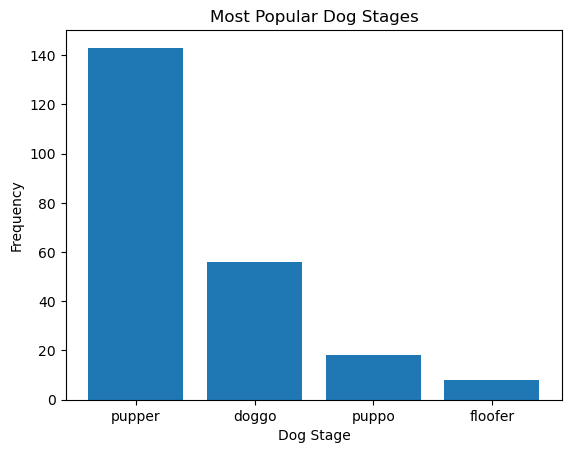

In [80]:
x = df.stage.value_counts()
plt.bar(x.index, x.values)
plt.xlabel('Dog Stage')
plt.ylabel('Frequency')
plt.title('Most Popular Dog Stages');

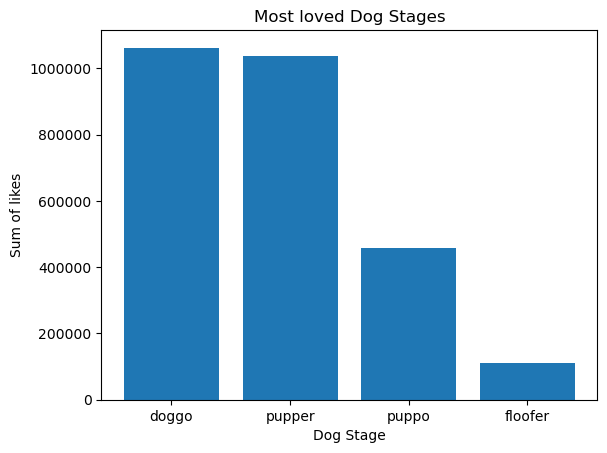

In [81]:
x = df.groupby(['stage']).favorite_count.sum().sort_values(ascending=False)
plt.bar(x.index, x.values)
plt.xlabel('Dog Stage')
plt.ylabel('Sum of likes')
plt.title('Most loved Dog Stages')
plt.ticklabel_format(style='plain', axis='y');

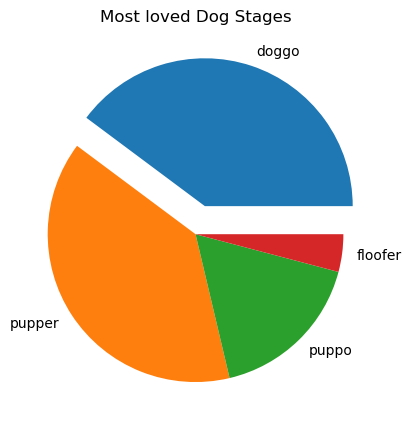

In [82]:
p = df.groupby(['stage']).favorite_count.sum().sort_values(ascending=False)
y = np.array(p.values)
mylabels = p.index
myexplode = [0.2, 0, 0, 0]
plt.pie(y, labels=mylabels, explode=myexplode)

plt.title('Most loved Dog Stages', pad=20)
plt.show()